# Predicting Income with Boosting Algorithms

In this project, I embark on a journey into the realm of boosting algorithms, employing the power of data to forecast an individual's income. By utilizing this census dataset in conjunction with boosting algorithms, my objective is to predict whether an individual's income exceeds $50,000.

**Data Source**: The dataset is sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census+income) and contains information about individuals, including their age, education, work class, hours worked per week, gender, and race.

**Key Project Objectives:**

1. **Data Preprocessing**: The initial step involves cleaning the data by handling extra whitespace, defining the target column (income), and selecting relevant features for analysis.

2. **Data Exploration**: I delve into the dataset to understand the distribution of income levels and the data types of selected features.

3. **Preparing the Features**: To prepare the features for model training, I convert categorical variables into binary dummies and convert the target variable (income) into binary labels. A train-test split is also created for model evaluation.

4. **Model Building and Training**: I create and train two ensemble classifiers - AdaBoost and Gradient Boosting - to classify individuals based on their income. The models are fitted and evaluated based on accuracy and F1-score.

5. **Hyperparameter Tuning**: For the AdaBoost classifier, I perform hyperparameter tuning by varying the number of estimators. I conduct a grid search to find the optimal number of estimators that maximizes the mean test score.

6. **Visualizing the Results**: The project concludes with a visual representation of the mean test scores as the number of estimators varies, helping us identify the optimal parameter setting.

**Summary:**  
This project offers a comprehensive understanding of machine learning model analysis and optimization. Starting with data preprocessing, I dive into exploring the dataset, feature preparation, and model building using ensemble methods. I assess model performance and engage in hyperparameter tuning to fine-tune our classifiers for improved results. Ultimately, the project demonstrates the importance of careful analysis and optimization in the world of machine learning, providing valuable insights for making data-driven decisions.

----------

## Import Libraries

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Get Data

In [8]:
# Save the path of the data
path_to_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Create a list of column names
col_names = [
    'age', 'workclass', 'fnlwgt','education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss',
    'hours-per-week','native-country', 'income'
]

# Load the data into a dataframe
df = pd.read_csv(path_to_data, header=None, names = col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Wrangling

In [9]:
# Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

# Define the target column (dependent variable)
target_column = "income"

# Create a list containing all features    
raw_feature_cols = [
    'age',
    'education-num',
    'workclass',
    'hours-per-week',
    'sex',
    'race'
]

## Data Exploration

In [10]:
# Percentage of samples with income < and > 50k
print(df[target_column].value_counts(normalize=True))

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [11]:
# Data types of features
print(df[raw_feature_cols].dtypes)

age                int64
education-num      int64
workclass         object
hours-per-week     int64
sex               object
race              object
dtype: object


## Preparing the features

In [12]:
# Converting categorical variables to dummies
X = pd.get_dummies(df[raw_feature_cols], drop_first=True)
X.head(n=5)

,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,40,False,False,False,False,False,False,True,False,True,False,False,False,True
1,50,13,13,False,False,False,False,False,True,False,False,True,False,False,False,True
2,38,9,40,False,False,False,True,False,False,False,False,True,False,False,False,True
3,53,7,40,False,False,False,True,False,False,False,False,True,False,True,False,False
4,28,13,40,False,False,False,True,False,False,False,False,False,False,True,False,False


In [13]:
# Convert target variable to binary
y = np.where(df[target_column] == '<=50K', 0, 1)

In [14]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Build and Train the AdaBoost and Gradient Boosted Trees Classifiers

In [15]:
# Create base estimator and store it as decision_stump
decision_stump = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost Classifier
ada_classifier = AdaBoostClassifier(estimator=decision_stump)

# Create GradientBoost Classifier
grad_classifier = GradientBoostingClassifier()

# Fit models and get predictions
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

grad_classifier.fit(X_train, y_train)
y_pred_grad = grad_classifier.predict(X_test)

# Print accuracy and F1
print(f"AdaBoost accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"AdaBoost f1-score: {f1_score(y_test, y_pred_ada)}")

print(f"Gradient Boost accuracy: {accuracy_score(y_test, y_pred_grad)}")
print(f"Gradient Boost f1-score: {f1_score(y_test, y_pred_grad)}")

AdaBoost accuracy: 0.8142082096427474
AdaBoost f1-score: 0.5311289072591061
Gradient Boost accuracy: 0.8187122530453476
Gradient Boost f1-score: 0.5474060822898031


## Hyperparameter Tuning

In [16]:
# Create list of number of estimators we want to test
n_estimators_list = [10, 30, 50, 70, 90]

# Create a dictionary of hyperparameters to search
estimator_parameters = {'n_estimators': n_estimators_list}

# Create a gridsearch object with the AdaBoost classifier and the hyperparameters
ada_gridsearch = GridSearchCV(ada_classifier, estimator_parameters, cv=5, scoring='accuracy', verbose=True)

# Fit the gridsearch
ada_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'n_estimators': [10, 30, 50, 70, 90]},
             scoring='accuracy', verbose=True)

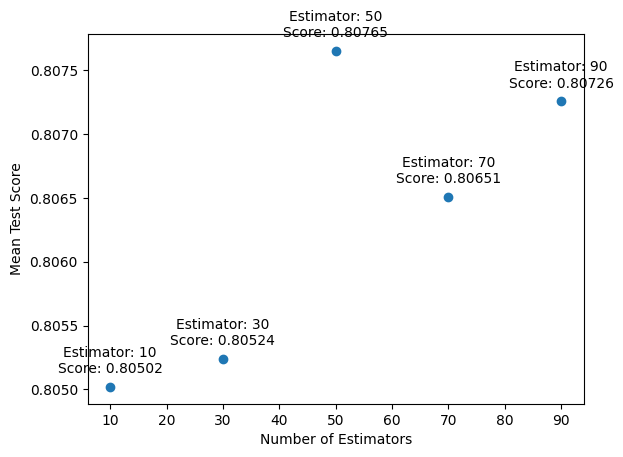

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot mean test scores
ada_scores_list = ada_gridsearch.cv_results_['mean_test_score']
estimator_params_list = ada_gridsearch.cv_results_['params']

# Create a scatter plot with values above the points
plt.scatter(n_estimators_list, ada_scores_list)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')

# Annotate each point with its corresponding value and estimator number
for i, (score, params) in enumerate(zip(ada_scores_list, estimator_params_list)):
    estimator_number = params['n_estimators']
    plt.annotate(f'Estimator: {estimator_number}\nScore: {score:.5f}', (n_estimators_list[i], score), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
plt.clf()

**Summary:**  
While an increasing number of estimators marginally increases the mean test scores we achieve, we find the highest score (.80765) for 50 estimators. Given that for AdaBoost the default n_estimators is 50 (for Gradient Boosting it is 100), the results indicate no need to adjust the n_estimator.